<a href="https://colab.research.google.com/github/miguel-fc/PyTorch-tools/blob/main/nr_RF_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Python related required packages
import gdown
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [4]:
!gdown "https://drive.google.com/uc?id=1-6dVAhChOpv8vD-7ZttTVo8qO7ffXiw8"

Downloading...
From: https://drive.google.com/uc?id=1-6dVAhChOpv8vD-7ZttTVo8qO7ffXiw8
To: /content/df_encoded_samples.pkl
100% 83.9k/83.9k [00:00<00:00, 49.7MB/s]


In [5]:
#Convert the database into a pandas dataframe
df = pd.read_pickle('df_encoded_samples.pkl')

In [6]:
df

,l1,l2,label0,label1,label2,label3
0,-0.151300,-0.754397,0.173,-0.153,-0.448,1.95091
1,-1.065300,0.142591,0.136,-0.27,-0.0914,1.13422
2,-0.141380,-0.994959,0.281,-0.173,-0.559,1.47462
3,-0.105154,-0.216667,0.142,-0.155,-0.0299,2.0942
4,-0.182387,-0.242109,0.164,-0.193,-0.0469,2.05927
...,...,...,...,...,...,...
624,-0.877373,-0.888442,0.194,-0.483,-0.439,1.33287
625,-0.687009,-1.120308,0.176,-0.402,-0.592,1.11189
626,-0.025303,-0.573619,0.269,-0.021,-0.539,10.94212
627,-0.301702,-0.415003,0.141,-0.287,-0.174,2.64033


In [7]:
def run_rf(data,ldim,in_label):
  #Analyzing individual labels.

  label = in_label
  ld = ldim

#Creating the X database according to data and the dimension of the latent space
  vars = []
  for i in range(ld):
    var = 'l' + str(i+1)
    vars.append(var)

  X = df[vars]
  y = df[label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=134)

  #Searching for the best rf
  ## Define Grid 
  grid = { 
      'n_estimators': [200,300,400],
      'max_features': ['sqrt','log2'],
      'max_depth' : [3,4,5],
      'random_state' : [18]
  }

  rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
  rf.fit(X_train, y_train)

  # print(rf.best_estimator_)
  # print(rf.best_score_)

  #Fit the best random forest for this label
  # n_rf = RandomForestRegressor(n_estimators = 400, max_depth=3, max_features='sqrt',random_state=18)
  n_rf = rf.best_estimator_
  n_rf.fit(X_train,y_train)

  #Predict labels with the best forest
  y_pred_label = n_rf.predict(X_test)
  print('R^2({}) = '.format(label), n_rf.score(X_test, y_test)*100.0)

  # Plot to compare original and predicted labels 
  # and the feature importance
  fig = plt.figure(figsize=(20, 10))
  ax = fig.add_subplot(1,2,1)
  ax.scatter(y_test,y_pred_label)
  ax.set_xlabel('Actual {}'.format(label))
  ax.set_ylabel('Predicted {}'.format(label))

  ax = fig.add_subplot(1,2,2)
  plt.barh(X_train.columns.values,n_rf.feature_importances_)
  ax.set_xlabel("Random Forest Feature Importance")
  ax.set_title(label)

  plt.show()

  return


R^2(label0) =  -3.1799961688389278


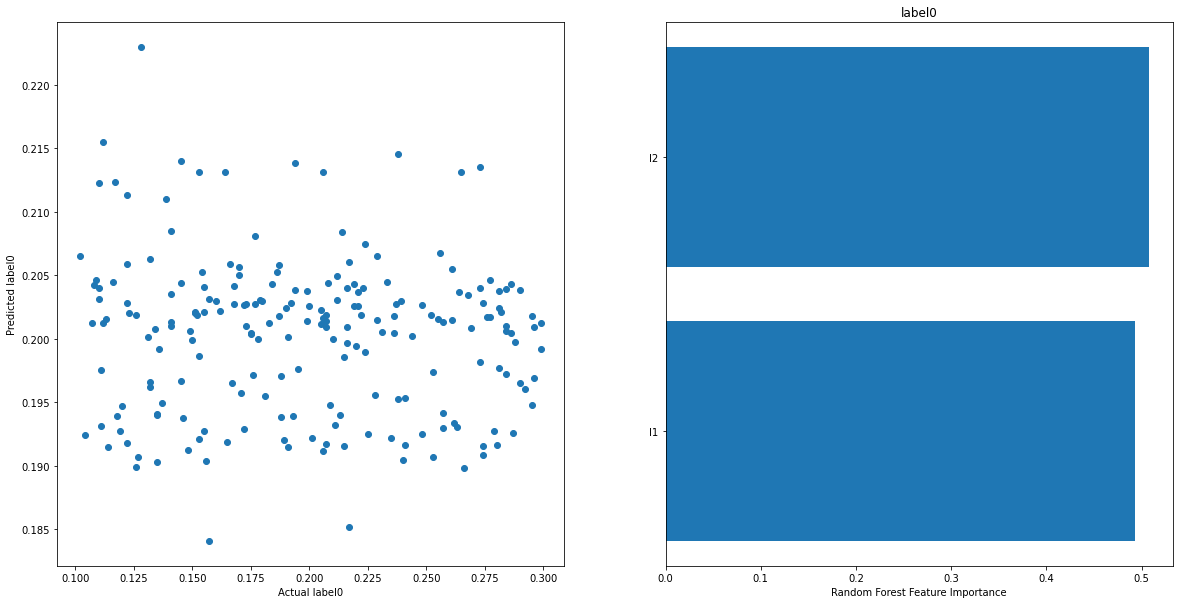

R^2(label1) =  82.12614223762269


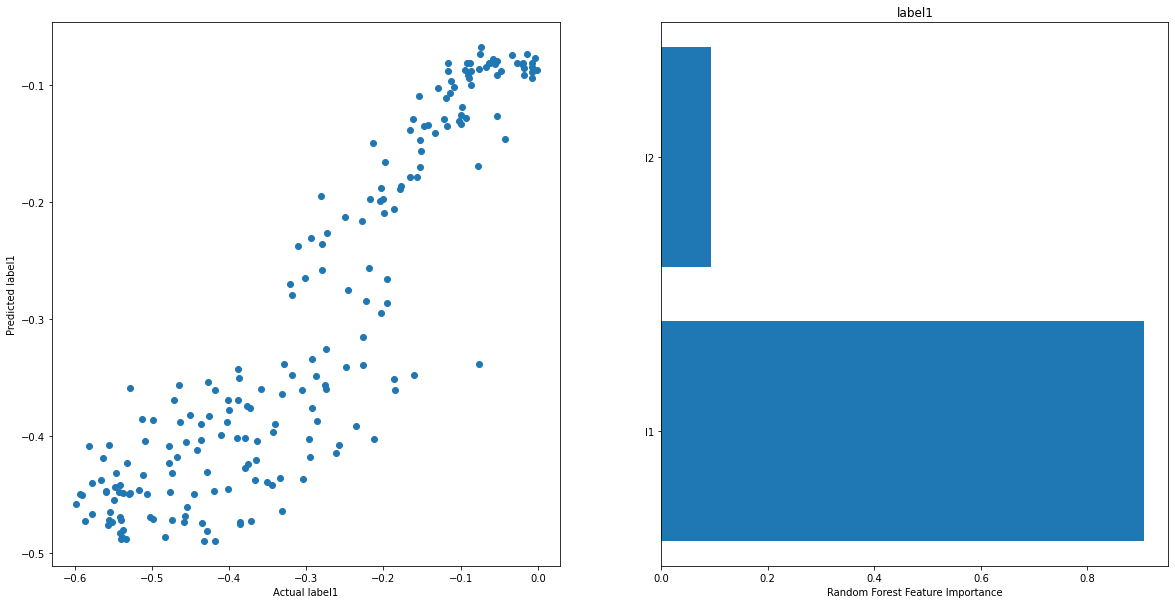

R^2(label2) =  79.88713668268971


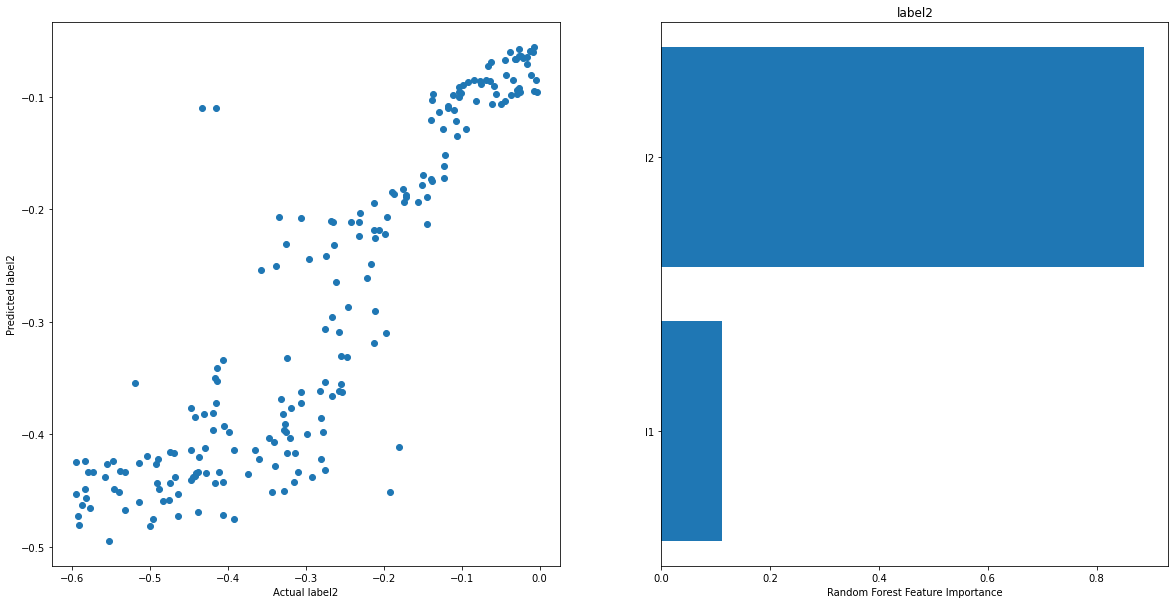

R^2(label3) =  30.681963453278005


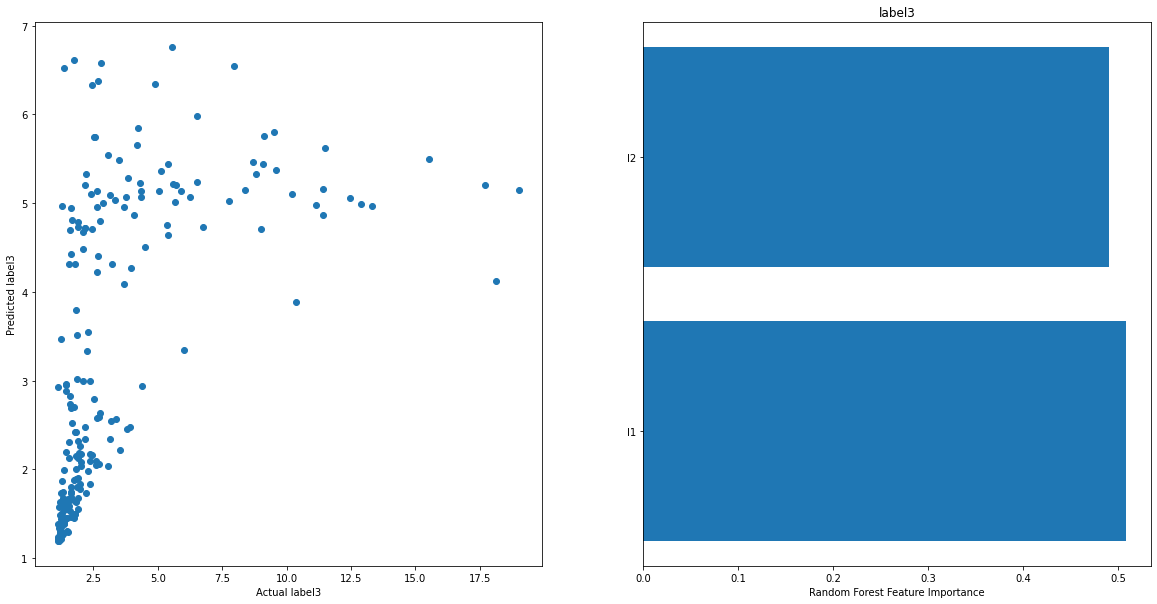

In [8]:
#Input here the name of the dataframe and the
#dimension of the latent space and the number
#of labels 

data = df
ldim = 2
nlabels = 4


#Running the random forest for each label
for i in range(nlabels):
  label = 'label'+str(i)
  # print(label)
  run_rf(data,ldim,label)
